Based on [this paper](http://www.plantphysiol.org/content/183/2/637/tab-figures-data#fig-data-additional-files) we want to see in what category our Azolla MYC-likes fall, perhaps reproduce some trees and check if the shared domains coïncide with what is described in the paper. 

We're starting with family VI and VII MYBs. This is a screenshot of the supplementary figure for VI
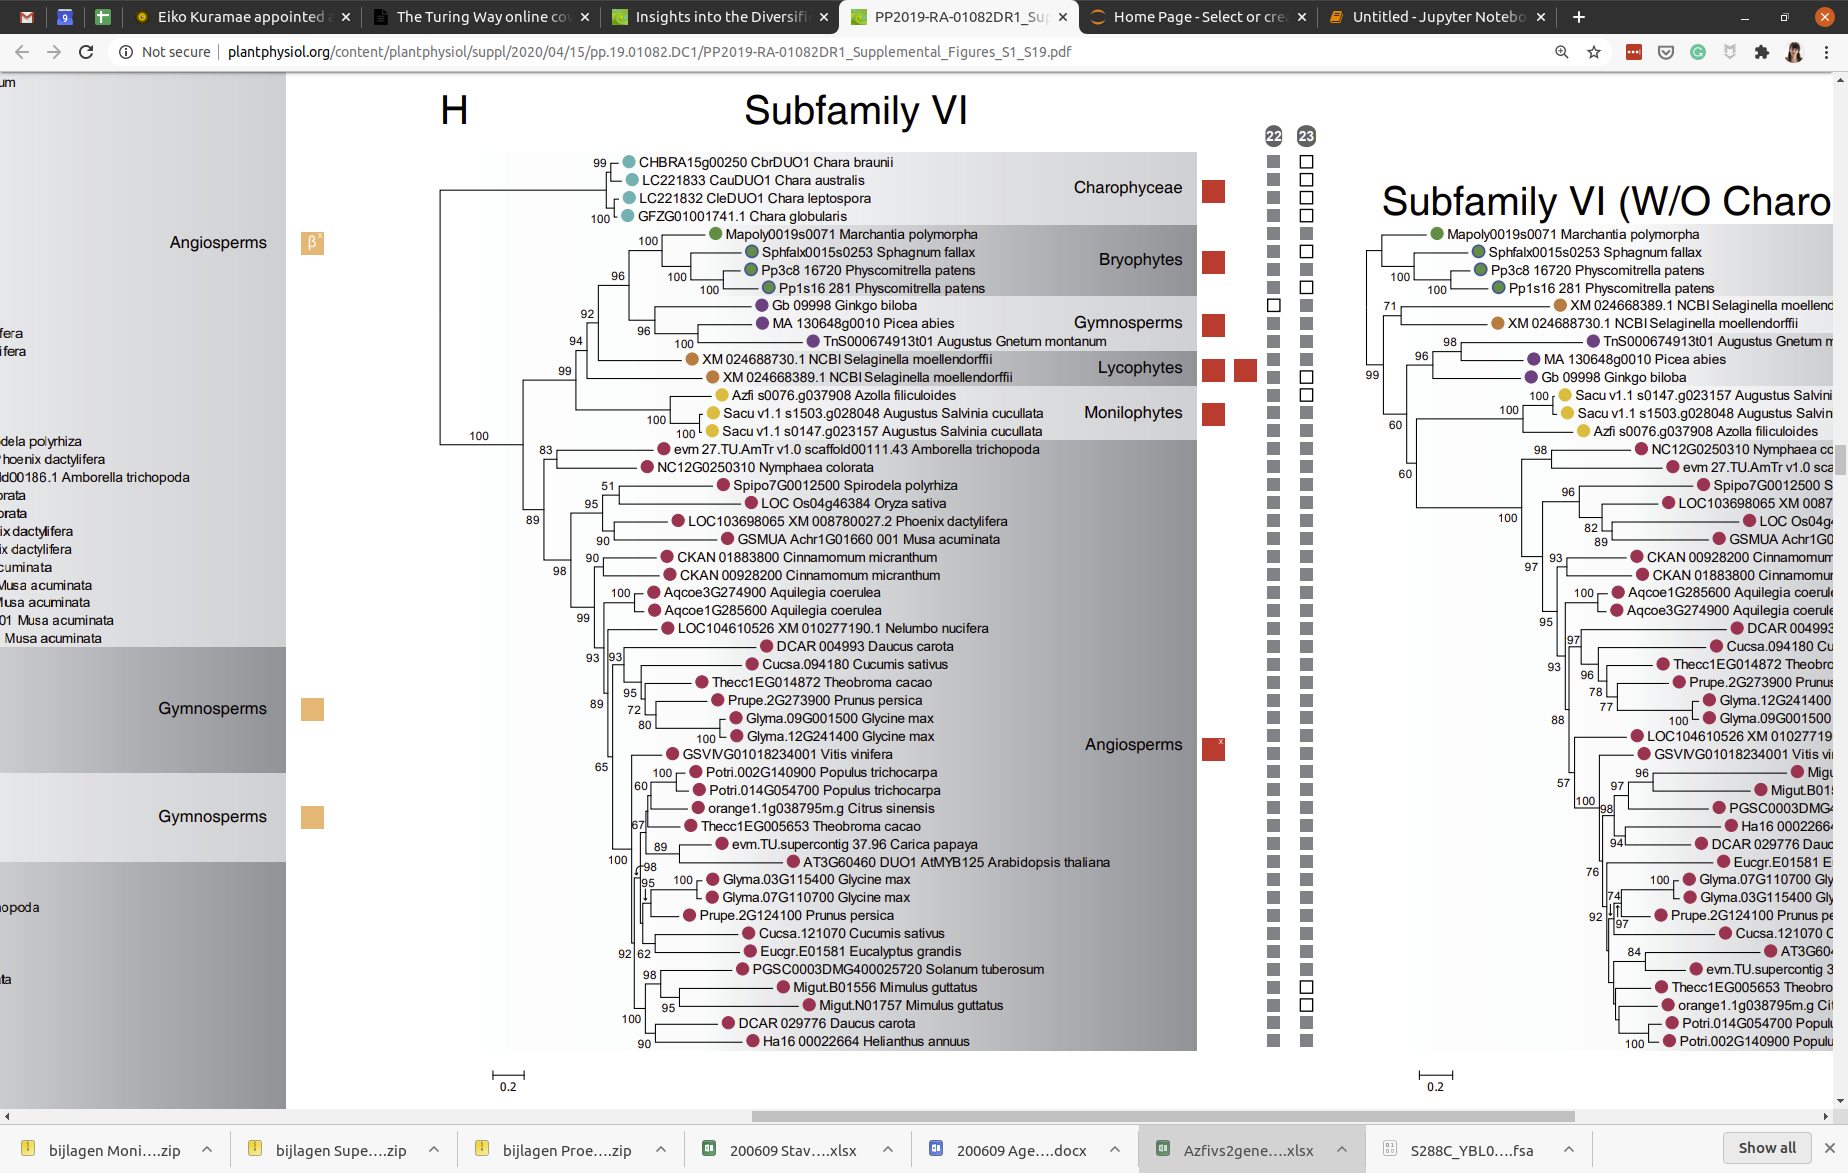

And for VII:
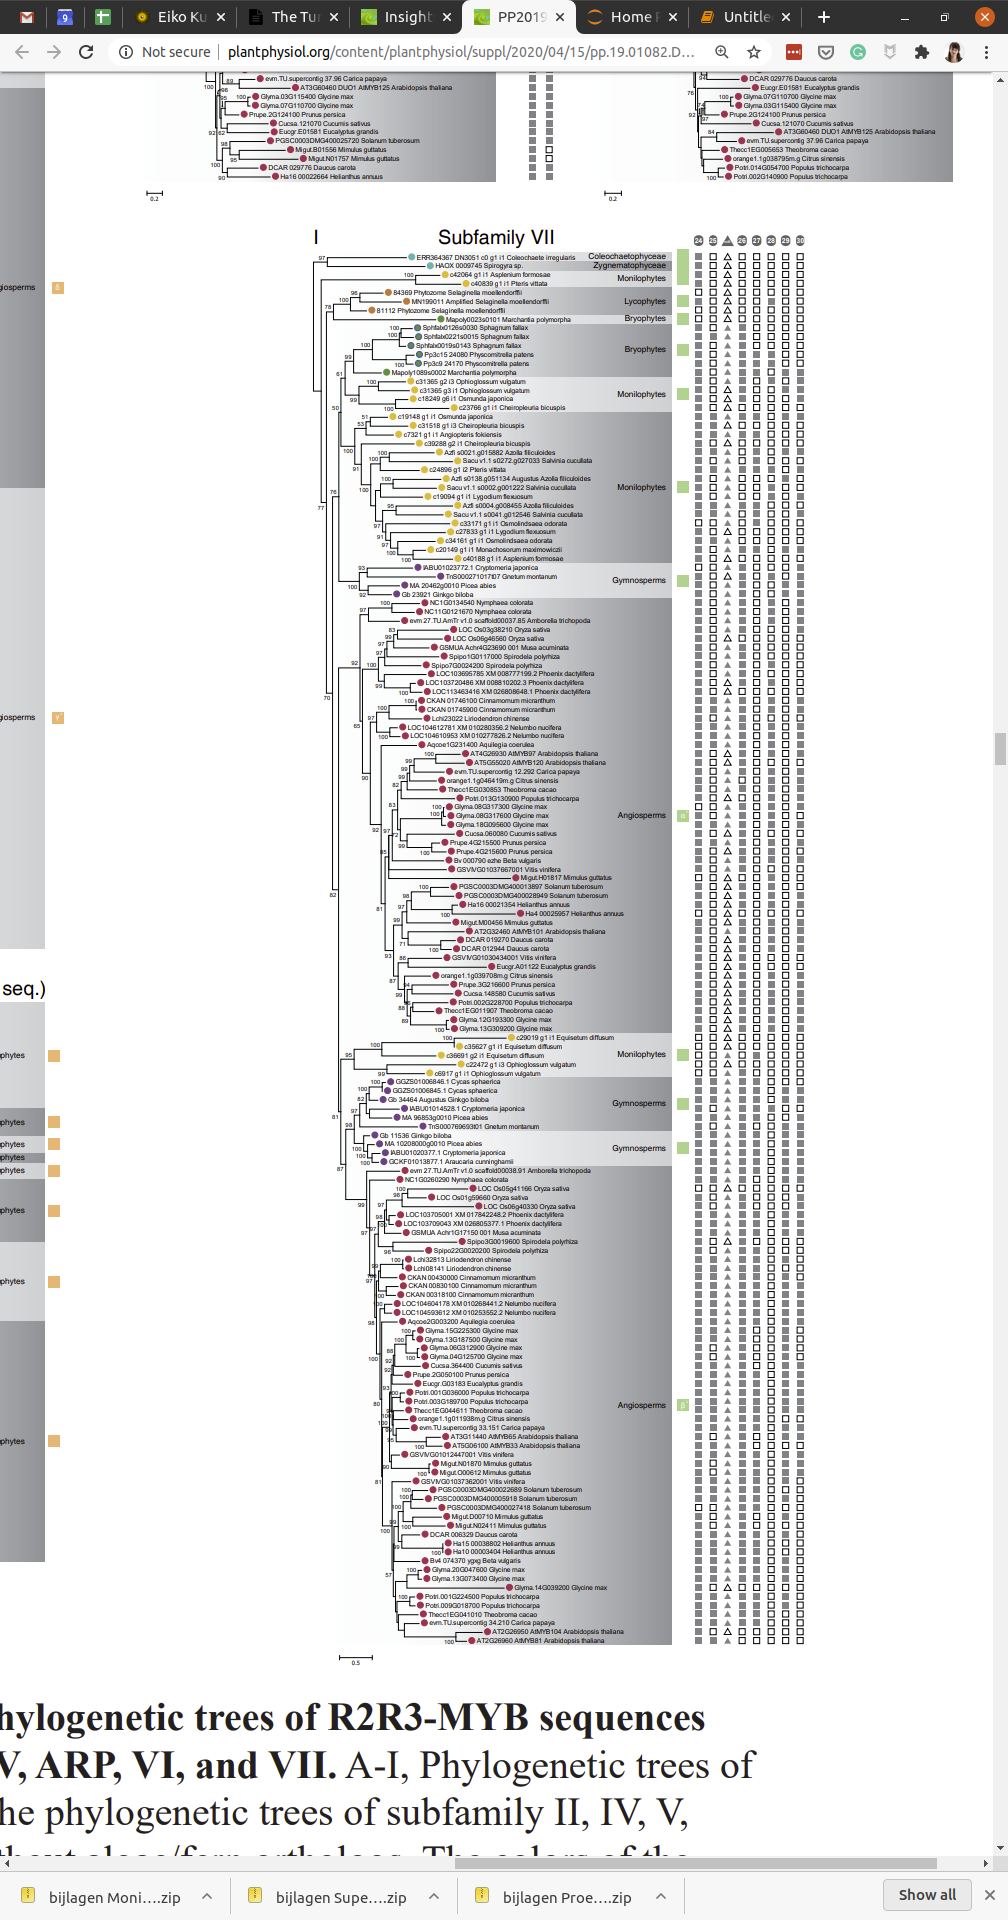

Finally, I want to check if we find the domains like in this figure:
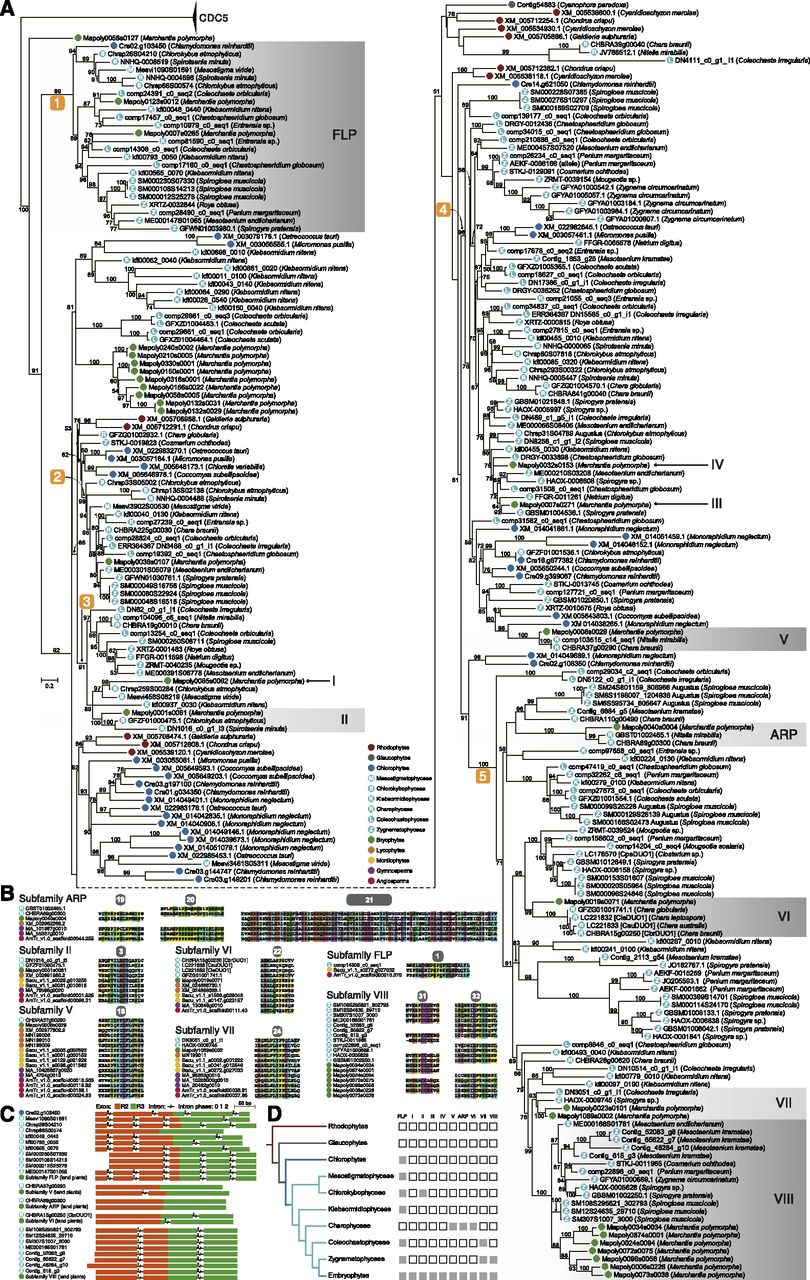

I'm looking first to find the following sequences. For Subfamily  VI:
 * **CHBRA15G00250 Cbrduo1   -> "g8575"**
 * **LC221833 CauDUO1**
 * **LC221832 CleDUO1**
 * **GFZG01001741.1**
 * **Mapoly0017s0071**
 * **XM_024688710.1**
 * **XM_024668389.1**
 * **Sacu_v1.1_s1503.g028048**
 * **Sacu_v1.1_s0147.g023157**
 * **MA_130648g0010**
 * **AmTr_v1.0_scaffold00111.43**
 
And for Subfamily VII
 * DN3051_co_g1_i1
 * **HAOX-0009745**
 * **Mapoly1089s0002** 
 * **MN199011**
 * **Sacu_v1.1_s0002.g001222**
 * **Sacu_v1.1_s0041.g012546**
 * **Sacu_v1.1_s0272.g027033**
 * **MA_96853g0010**
 * **MA_10208000g0010**
 * **MA_20462g0010**
 * **AmTr_v1.0_scaffold00038.91**
 * **AmTr_v1.0_scaffold00037.85**
 
Now the first step is to get those sequences from their various sources, store these in the data folder, check if I can align these and find the pattern shown in figure 2 of the paper (shown above) and finaly check if our Azolla filiculoides sequences fit in one or the other category.

DN3051_co_g1_i1: paper points to raw sequencing of the 1kP project. I don't have the patience for this so I'll leave this one out.

The VI sequences were mostly findable via ncbi. Sacu sequences were retrieved from fernbase.org. MA_ sequences are from the _Picea abies_ genome and were retrieved from congenie.org. AmTr sequences were retrieved via jgi phytozome. After login, the original annotation files can be downloaded and searched for the genes of interest. It is a bit of a hassle to get them all.

Now to proceed, let's 
 1. linearise and combine
 2. allign
 3. identify domains
 4. add Azolla sequences and repeat.
 5. for the fun of it, make a phylogenetic tree
 
 I'm using code from my phylogenetics workflow here https://github.com/lauralwd/lauras_phylogeny_wf/blob/master/tree_building_workflow.ipynb

### 1 linearise and combine

In [2]:
tree

.
├── azolla_mycs.ipynb
├── conda-env.yaml
└── data
    ├── VII_sequences.fasta
    └── VI_sequences.fasta

1 directory, 4 files


In [5]:
for i in data/*fasta
do  inseq=$(echo $i | cut -d '/' -f 2 | cut -d '.' -f 1)
    cat data/$inseq.fasta \
     | awk '/^>/ {printf("%s%s\n",(N>0?"\n":""),$0);N++;next;} {printf("%s",$0);} END {printf("\n");}' \
     > data/"$inseq"_linear.fasta
done

In [7]:
cat data/*_sequences_linear.fasta > data/combi_sequences_linear.fasta

In [8]:
tree

.
├── azolla_mycs.ipynb
├── conda-env.yaml
└── data
    ├── combi_sequences_linear.fasta
    ├── VII_sequences.fasta
    ├── VII_sequences_linear.fasta
    ├── VI_sequences.fasta
    └── VI_sequences_linear.fasta

1 directory, 7 files


### 2 align

In [3]:
conda activate phylogenetics

(phylogenetics) 

: 1

In [4]:
if    [ ! -d ./data/alignments_raw/ ]
then  mkdir  ./data/alignments_raw
fi
for   i in data/*sequences_linear.fasta
do    inseq=$(echo $i | cut -d '/' -f 2 | cut -d '.' -f 1)
      if    [ ! -f "./data/alignments_raw/$inseq"_aligned-mafft.fasta ]
      then  linsi --thread $(nproc) data/$inseq.fasta > ./data/alignments_raw/"$inseq"_aligned-mafft-linsi.fasta
      fi
done

(phylogenetics) outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
All-to-all alignment.
tbfast-pair (aa) Version 7.407
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
4 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
   20 / 22
done.

Progressive alignment ... 
STEP    21 /21 (thread    0) 
done.
tbfast (aa) Version 7.407
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
4 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 4
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.

   20 / 22
Segment   1/  1    1-1913
008-0040-0 (thread    3) worse         
Converged2.
done
dvtditr (aa) Version 7.407
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
4 thread(s)


Strategy:
 L-INS-i (Probably most accurate, very slow)


: 1

In [5]:
conda deactivate

In [6]:
tree data

data
├── alignments_raw
│   ├── combi_sequences_linear_aligned-mafft-linsi.fasta
│   ├── VII_sequences_linear_aligned-mafft-linsi.fasta
│   └── VI_sequences_linear_aligned-mafft-linsi.fasta
├── combi_sequences_linear.fasta
├── VII_sequences.fasta
├── VII_sequences_linear.fasta
├── VI_sequences.fasta
└── VI_sequences_linear.fasta

1 directory, 8 files


### 3 Identify domains